# Data preparation

In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
sns.set_style('whitegrid')

In [61]:
titanic_train = pd.read_csv('../../#data-sets/titanic-train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('../../#data-sets/titanic-test.csv', index_col='PassengerId')

In [62]:
titanic_train.info()
print('\n')
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 

In [63]:
combined = pd.concat((titanic_train, titanic_test), axis=0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [64]:
Title_Dictionary = {
                    "Capt":       "Officer", 
                    "Col":        "Officer",
                    "Major":      "Officer", 
                    "Jonkheer":   "Royalty", 
                    "Don":        "Royalty", 
                    "Sir" :       "Royalty", 
                    "Dr":         "Officer",
                    "Rev":        "Officer", 
                    "the Countess":"Royalty", 
                    "Dona":       "Royalty", 
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty" 
                    } 

combined['Title'] = combined['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

In [65]:
ages_mean = combined.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='mean')
ages_mean

Sex         female                             male                     
Pclass           1          2          3          1          2         3
Title                                                                   
Master         NaN        NaN        NaN   6.984000   2.757273   6.09000
Miss     30.131148  20.717083  17.360874        NaN        NaN       NaN
Mr             NaN        NaN        NaN  41.450758  32.346715  28.31891
Mrs      42.926471  33.418182  32.326531        NaN        NaN       NaN
Officer  49.000000        NaN        NaN  51.090909  40.700000       NaN
Royalty  40.000000        NaN        NaN  42.333333        NaN       NaN

In [66]:
ages_std = combined.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='std')
ages_std

Sex         female                             male                     
Pclass           1          2          3          1          2         3
Title                                                                   
Master         NaN        NaN        NaN   4.974061   2.723942  4.152566
Miss     11.528914  12.207963   9.935434        NaN        NaN       NaN
Mr             NaN        NaN        NaN  13.489020  11.862038  9.907858
Mrs      14.122403  10.422005  10.194745        NaN        NaN       NaN
Officer        NaN        NaN        NaN   9.689732  12.927576       NaN
Royalty   7.549834        NaN        NaN   5.859465        NaN       NaN

In [67]:
def age_guesser(person):
    gender = person['Sex']
    mean_age = ages_mean[gender].loc[person['Title'], person['Pclass']]
    std = ages_std[gender].loc[person['Title'], person['Pclass']]
    persons_age = np.random.randint(mean_age - std, mean_age + std)
    return persons_age

unknown_age = combined['Age'].isnull()
people_w_unknown_age = combined.loc[unknown_age, ["Age", "Title", "Sex", "Pclass"]]

people_w_unknown_age['Age'] = people_w_unknown_age.apply(age_guesser, axis=1)

known_age = combined['Age'].notnull()
people_w_known_age = combined.loc[known_age, ["Age", "Title", "Sex", "Pclass"]]

combined['new_age'] = pd.concat((people_w_known_age['Age'], people_w_unknown_age['Age']))
combined.head(7)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,new_age
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr,22.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs,38.0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss,26.0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs,35.0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr,35.0
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877,Mr,20.0
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463,Mr,54.0


In [68]:
combined['Embarked'].fillna('S', inplace=True)
combined['Fare'].fillna(value=combined['Fare'].mean(), inplace=True)

combined['kid'] = 0
combined.loc[combined.new_age <= 12, 'kid'] = 1

combined['parent'] = 0
combined.loc[(combined.Parch > 0) & (combined.new_age >= 18), 'parent'] = 1

combined['child'] = 0
combined.loc[(combined.Parch > 0) & (combined.new_age < 18), 'child'] = 1

combined.tail(5)

combined['family'] = combined['SibSp'] + combined['Parch']
combined.loc[combined.family > 0, 'family'] = 1

combined['male'] = (~combined['Sex'].str.contains('fe')).astype(int)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
Title       1309 non-null object
new_age     1309 non-null float64
kid         1309 non-null int64
parent      1309 non-null int64
child       1309 non-null int64
family      1309 non-null int64
male        1309 non-null int32
dtypes: float64(4), int32(1), int64(7), object(6)
memory usage: 189.2+ KB


In [69]:
not_needed = ['Age', 'Cabin', 'Name', 'Sex', 'Ticket', 'Parch', 'SibSp']
combined.drop(not_needed, axis=1, inplace=True)

In [70]:
categorical = ['Embarked', 'Title', 'Pclass']

for column in categorical:
    dummy = pd.get_dummies(combined[column], prefix=column).astype(int)
    combined = combined.join(dummy)
    combined.drop(column, axis=1, inplace=True)
    
combined.head()

,Fare,Survived,new_age,kid,parent,child,family,male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
1,7.2500,0.0,22.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,71.2833,1.0,38.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3,7.9250,1.0,26.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,53.1000,1.0,35.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
5,8.0500,0.0,35.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [71]:
df = combined.loc[:len(titanic_train), :]

df_test = combined.loc[len(titanic_train)+1:, :].copy()
df_test.drop('Survived', axis=1, inplace=True)

df.shape, df_test.shape

((891, 20), (418, 19))

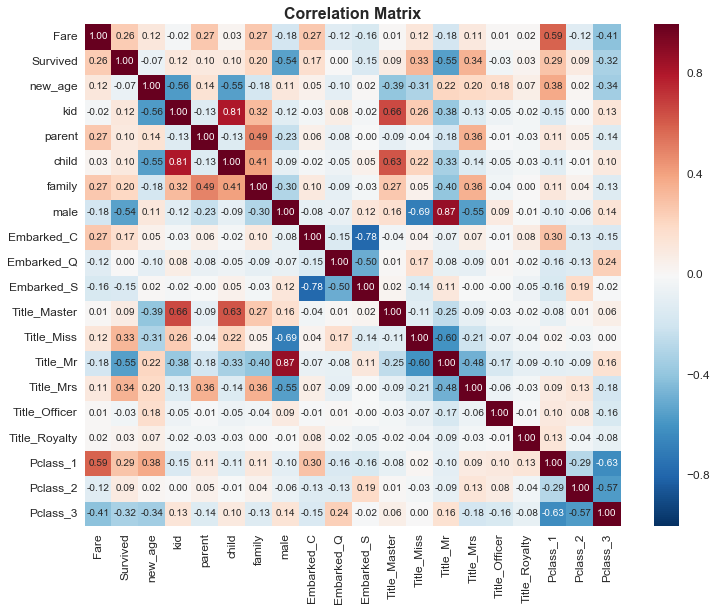

In [72]:
corr_mat = np.corrcoef(df.values.T)

ax = sns.heatmap(corr_mat, annot=True, fmt='.2f',
                 xticklabels=df.columns, yticklabels=df.columns,
                )

_ = (ax.set_title('Correlation Matrix'))

# Training

In [77]:
from sklearn.preprocessing import RobustScaler, Binarizer
from sklearn.feature_selection import RFECV, RFE
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split
from sklearn.decomposition import KernelPCA

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score



In [78]:
X_train = df.drop('Survived', 1)
y = df['Survived']

X_test_ = df_test.copy()

In [79]:
seed = 2016
folds = 10
scoring = 'accuracy'

kfold = StratifiedKFold(y=y, n_folds=folds, random_state=seed)

## Preprocessing

In [80]:
robust = RobustScaler()
robust.fit(X_train[['Fare', 'new_age']])

X = X_train.copy()
X_test = X_test_.copy()
X[['Fare', 'new_age']] = robust.transform(X_train[['Fare', 'new_age']])
X_test[['Fare', 'new_age']] = robust.transform(X_test_[['Fare', 'new_age']])

# Basic estimators

In [19]:
models = [('logreg', LogisticRegression(random_state=seed)), 
          ('knn', KNeighborsClassifier(n_neighbors=10)),
          ('svm', SVC(random_state=seed)),
          ('rf', RandomForestClassifier(n_estimators=50, random_state=seed)), 
          ('ada', AdaBoostClassifier(random_state=seed)),
          ('gbm', GradientBoostingClassifier(random_state=seed)), 
         ]

In [21]:
for name, model in models:
    result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0}:\t ({1:.4f}) +/- ({2:.4f})".format(name, result.mean(), result.std()))

logreg:	 (0.8205) +/- (0.0338)
knn:	 (0.8115) +/- (0.0359)
svm:	 (0.8114) +/- (0.0265)
rf:	 (0.8037) +/- (0.0380)
ada:	 (0.8171) +/- (0.0283)
gbm:	 (0.8306) +/- (0.0422)


# Hyperparameter tuning

In [81]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [82]:
kfold_tr = StratifiedKFold(y_tr, n_folds=5, random_state=seed)

## Random Forest

### Parameters tuning

In [24]:
n_estimators = [50, 100, 150, 200, 250, 300, 400, 500, 600]
sample_splits = [2, 4, 6, 8, 12, 16, 20]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for sample_split in sample_splits:
        rf = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample_split, 
                                    random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

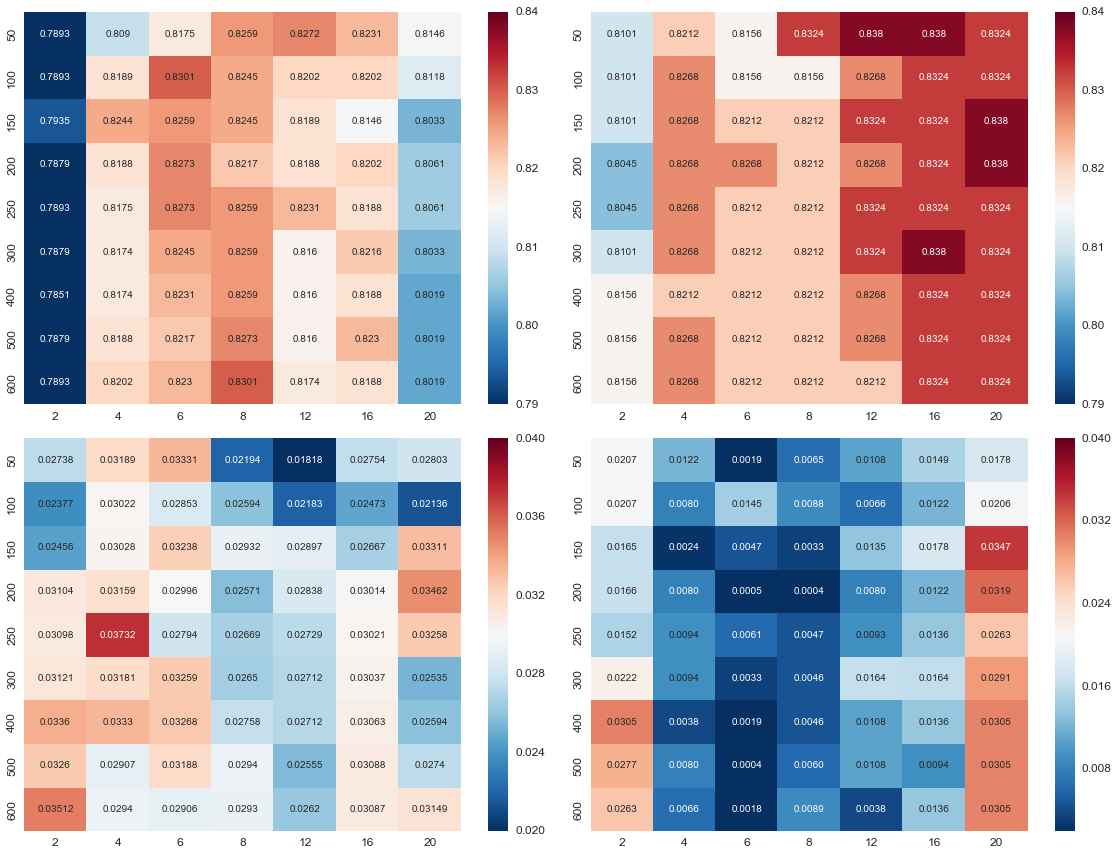

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.02, vmax=0.04,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

In [26]:
# n_estimators = [50, 100, 150, 200, 250, 300, 400, 500, 600]
sample_splits = [2, 4, 6, 8, 12, 16, 20]
max_depth = [2, 3, 4, 5, 6, None]

train_scores = []
test_scores = []
train_std = []

for depth in max_depth:
    train_sc = []
    test_sc = []
    train_dev = []
    for sample_split in sample_splits:
        rf = RandomForestClassifier(n_estimators=250, min_samples_split=sample_split, 
                                    max_depth=depth, random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

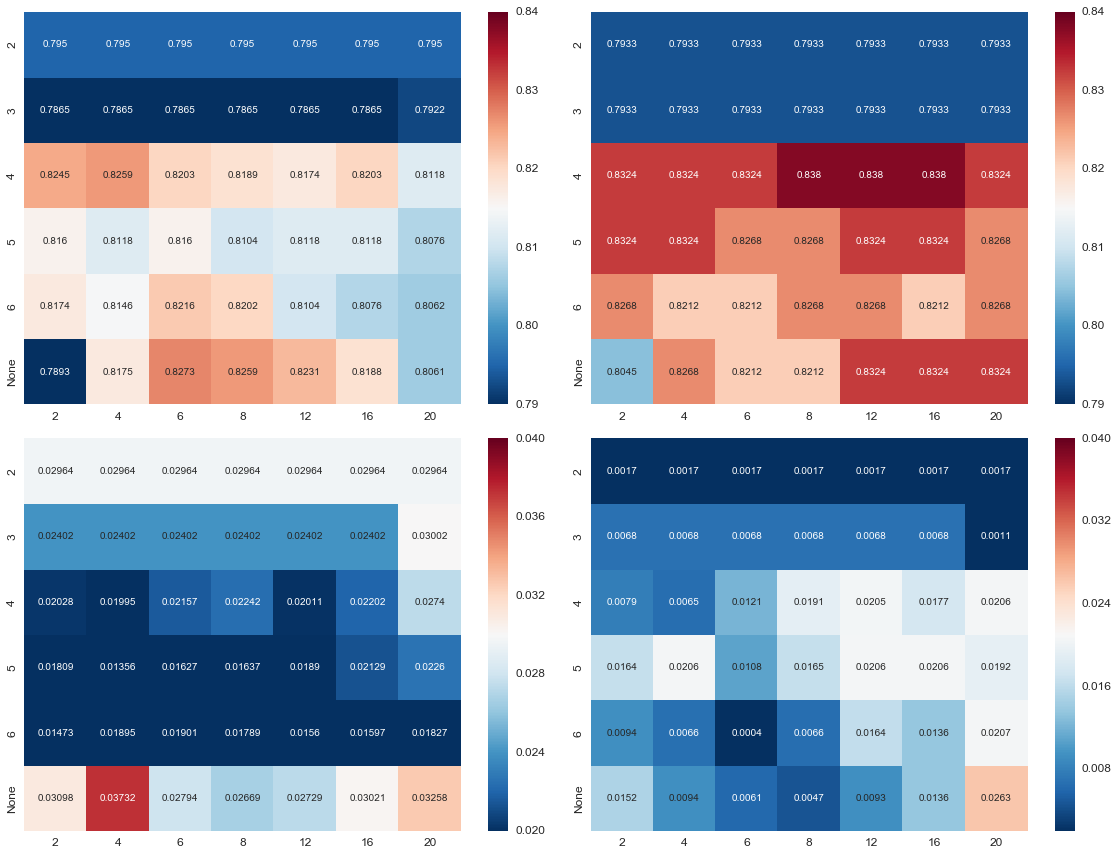

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=max_depth,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=max_depth,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.02, vmax=0.04,
            xticklabels=sample_splits, yticklabels=max_depth,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=sample_splits, yticklabels=max_depth,
            ax=axes[1][1]
           )


plt.tight_layout()

In [28]:
n_estimators = [50, 100, 150, 200, 250, 300, 400, 500, 600]
sample_splits = [2, 4, 6, 8, 12, 16, 20]
# max_depth = [2, 3, 4, 5, 6, None]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for sample_split in sample_splits:
        rf = RandomForestClassifier(n_estimators=estimator, min_samples_split=sample_split, 
                                    max_depth=6, random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

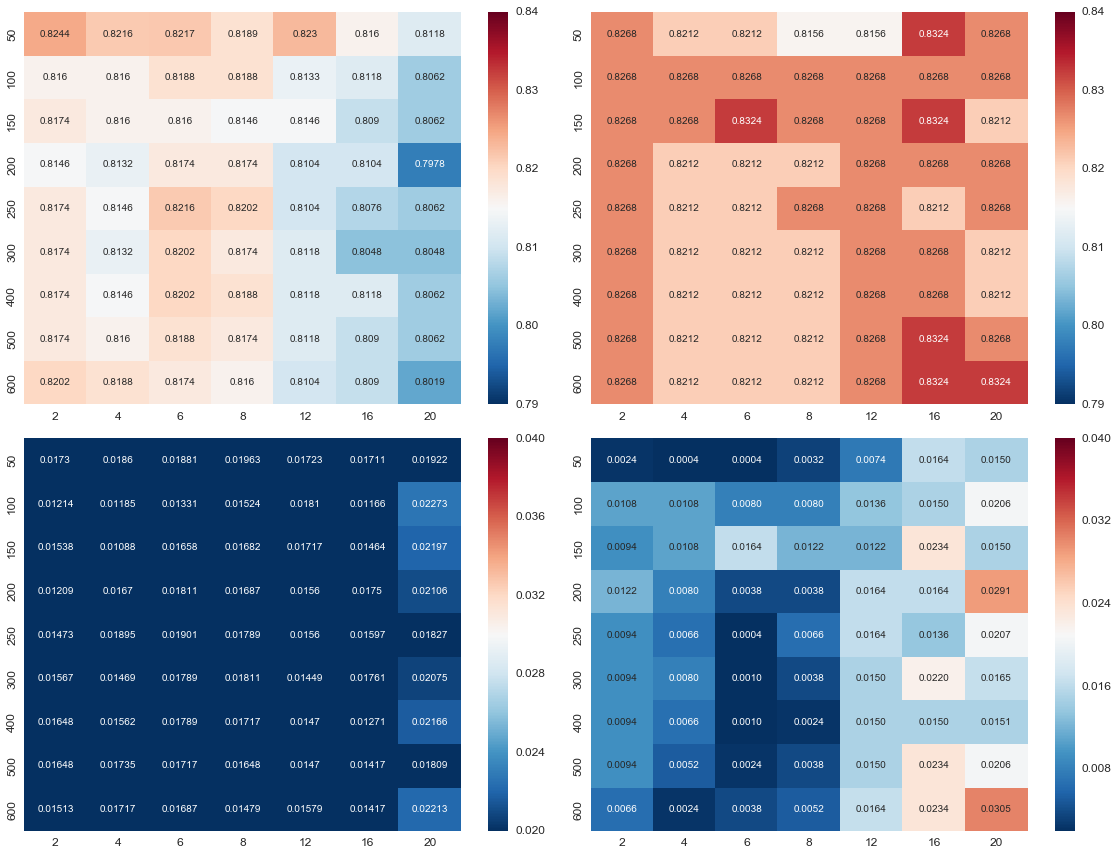

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.79, vmax=0.84,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.02, vmax=0.04,
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=sample_splits, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [83]:
rf_best = (RandomForestClassifier(n_estimators=300, min_samples_split=8, 
                                  max_depth=6, random_state=seed))

**Kaggle public score: 0.79426**

## Ada boost

### Parameters tuning

In [31]:
n_estimators = [50, 100, 150, 200, 250, 300, 400, 500, 600]
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = AdaBoostClassifier(n_estimators=estimator, learning_rate=rate, 
                                random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

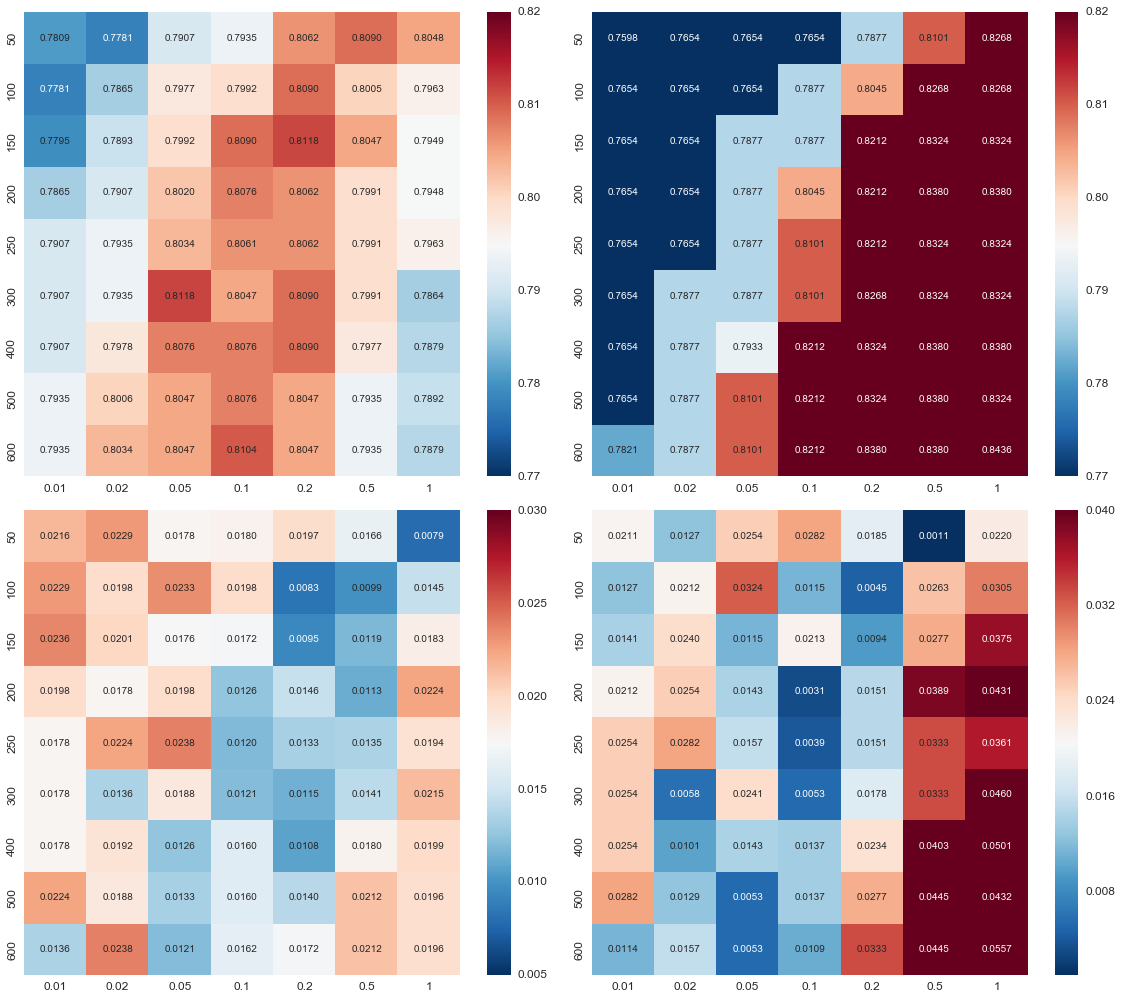

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16,14))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.77, vmax=0.82,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.77, vmax=0.82,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.005, vmax=0.03,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.04, 
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

In [33]:
n_estimators = [200, 250, 300, 400, 500, 600, 700, 800, 900]
learning_rates = [0.02, 0.05, 0.1, 0.15, 0.2, 0.5]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = AdaBoostClassifier(n_estimators=estimator, learning_rate=rate, 
                                random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

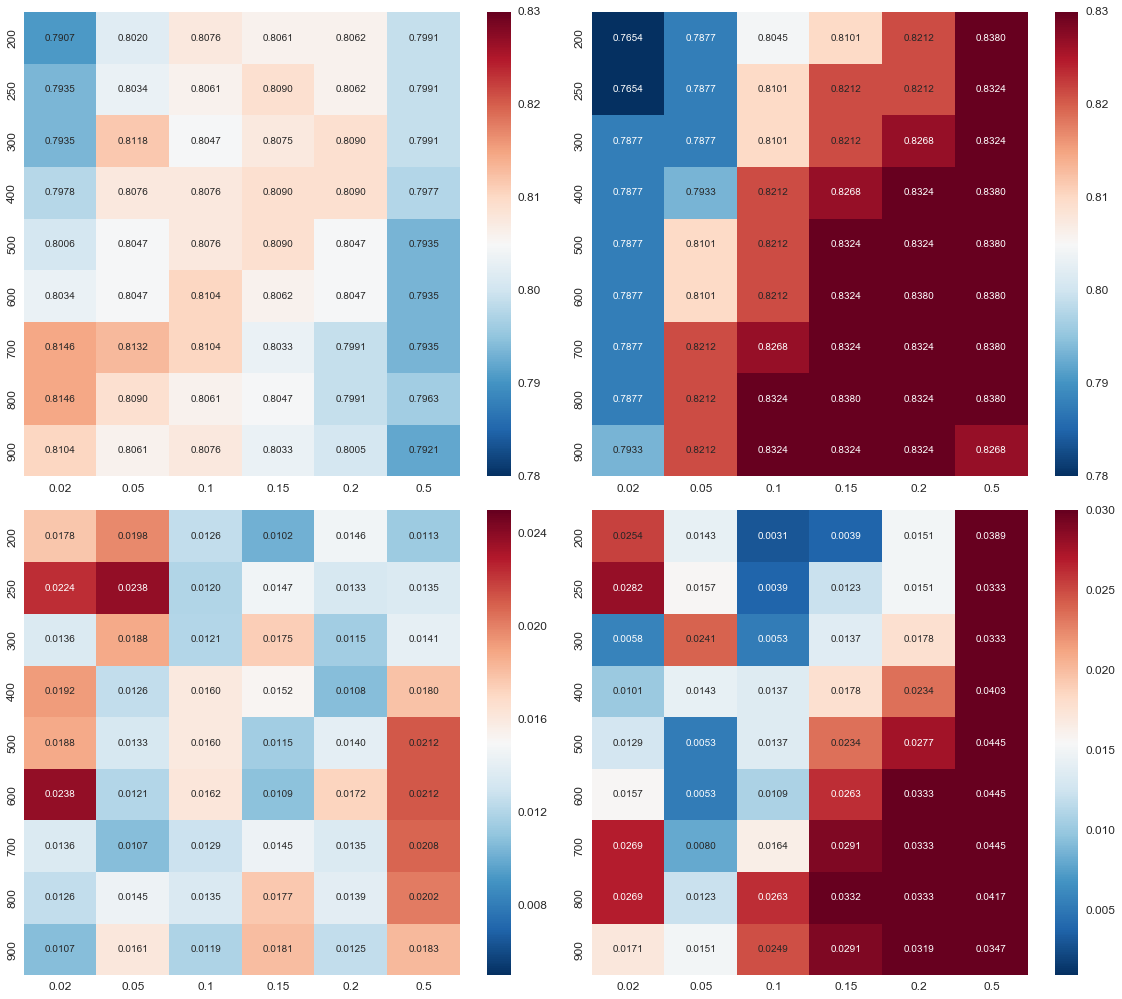

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16,14))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.83,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.83,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.005, vmax=0.025,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.03, 
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [84]:
ada_best = AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=seed)

**Kaggle public score: 0.76077**

## KNN

### Parameters tuning

In [36]:
neighborhood = [5, 10, 15, 20, 30, 40, 50, 60, 70]
pp = [1, 2, 3, 4]

train_scores = []
test_scores = []
train_std = []

for neighbor in neighborhood:
    train_sc = []
    test_sc = []
    train_dev = []
    for p in pp:
        rf = KNeighborsClassifier(n_neighbors=neighbor, p=p)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

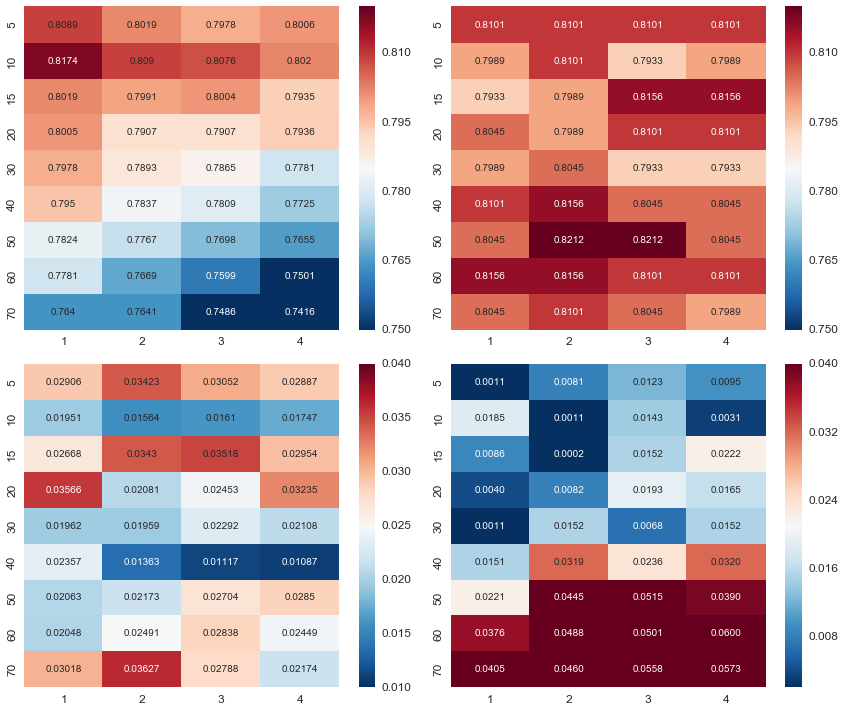

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[1][1]
           )


plt.tight_layout()

In [38]:
neighborhood = [20, 30, 40, 50, 60, 70, 80, 90, 100]
pp = [1, 2, 3, 4]

train_scores = []
test_scores = []
train_std = []

for neighbor in neighborhood:
    train_sc = []
    test_sc = []
    train_dev = []
    for p in pp:
        rf = KNeighborsClassifier(n_neighbors=neighbor, p=p)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

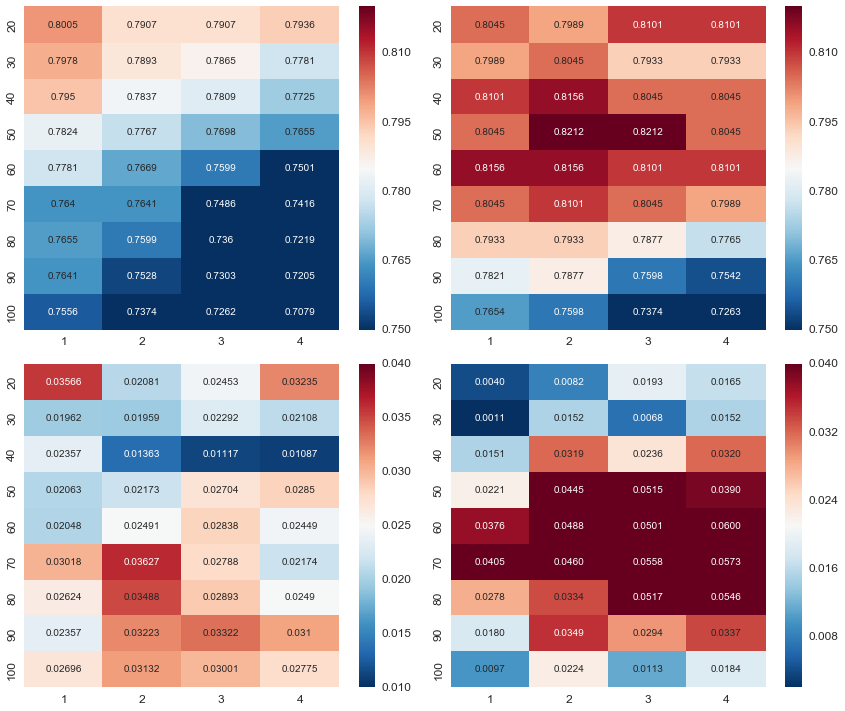

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=pp, yticklabels=neighborhood,
            ax=axes[1][1]
           )


plt.tight_layout()

In [40]:
neighborhood = [20, 30, 40, 50, 60, 70, 80, 90, 100]
# pp = [1, 2, 3, 4]
weights = ['uniform', 'distance']

train_scores = []
test_scores = []
train_std = []

for neighbor in neighborhood:
    train_sc = []
    test_sc = []
    train_dev = []
    for weight in weights:
        rf = KNeighborsClassifier(n_neighbors=neighbor, p=2, weights=weight)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

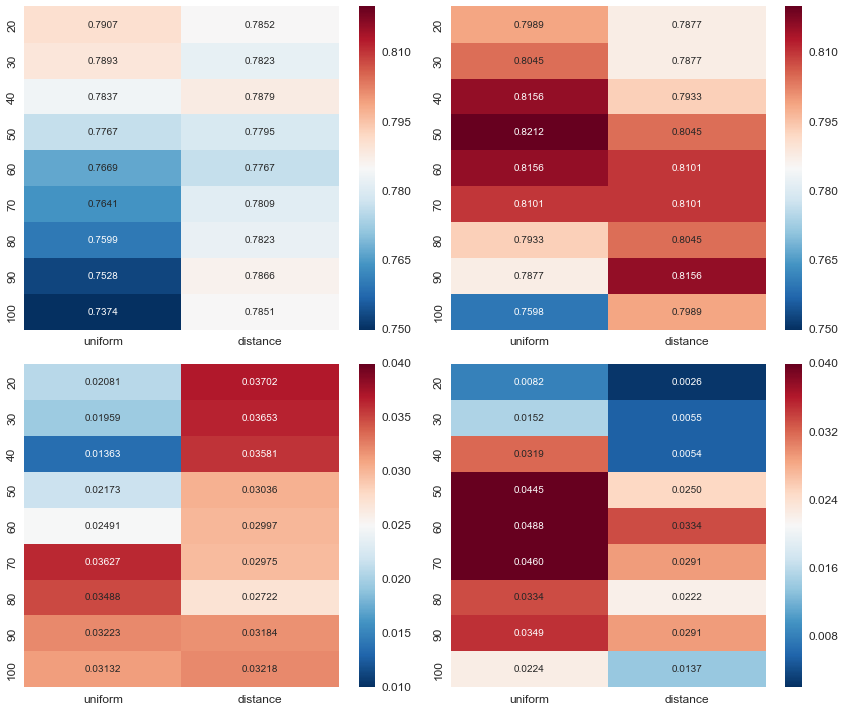

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.heatmap(train_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=weights, yticklabels=neighborhood,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.75, vmax=0.82,
            xticklabels=weights, yticklabels=neighborhood,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4g', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=weights, yticklabels=neighborhood,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04, 
            xticklabels=weights, yticklabels=neighborhood,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [85]:
knn_best = KNeighborsClassifier(n_neighbors=30)

**Kaggle public score: 0.75598**

## Gradient boost

### Parameters tuning

In [43]:
n_estimators = [50, 100, 150, 200, 250, 300, 400, 500, 600]
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = GradientBoostingClassifier(n_estimators=estimator, learning_rate=rate,
                                        random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

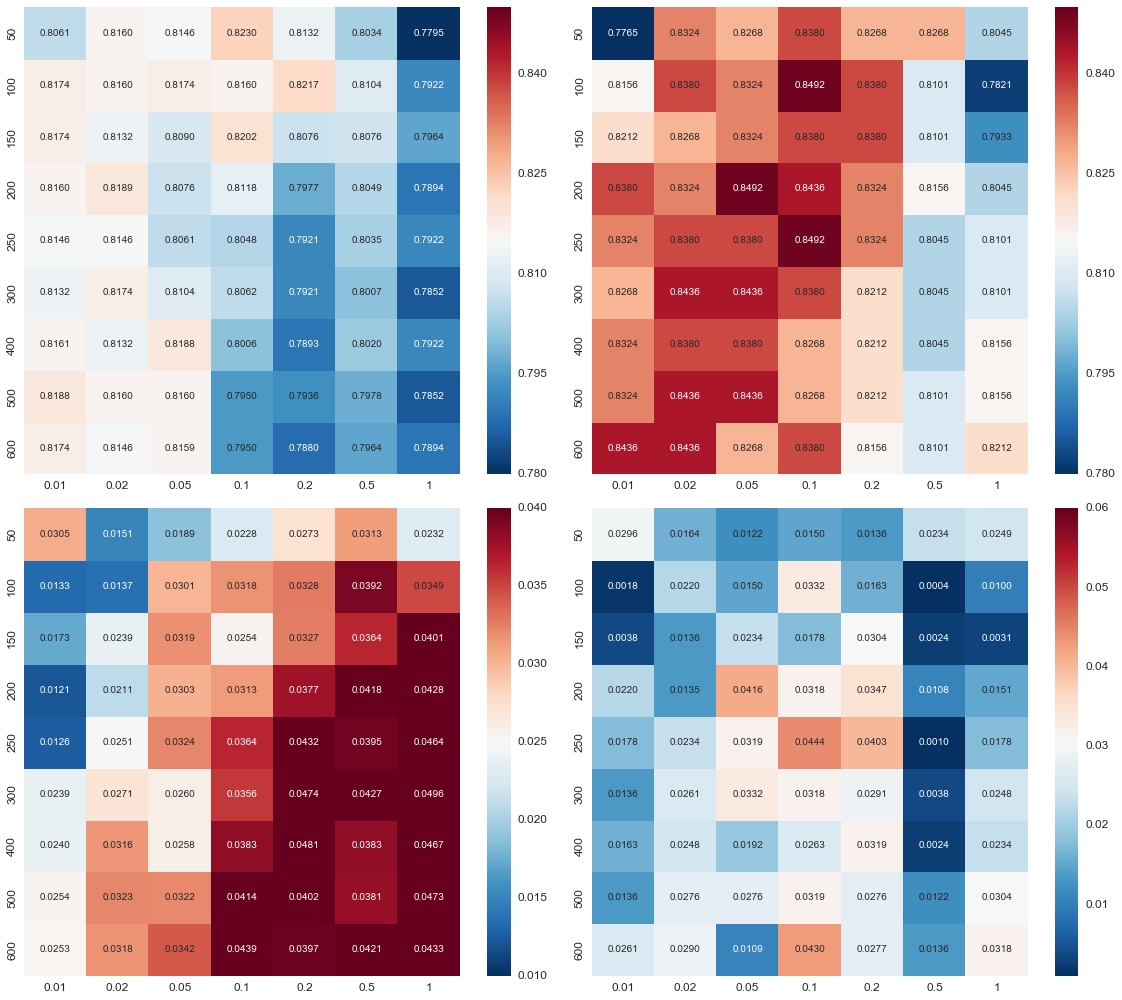

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16,14))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.06, 
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

In [45]:
n_estimators = [200, 250, 300, 400, 500, 600, 700, 800, 900]
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = GradientBoostingClassifier(n_estimators=estimator, learning_rate=rate,
                                        random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

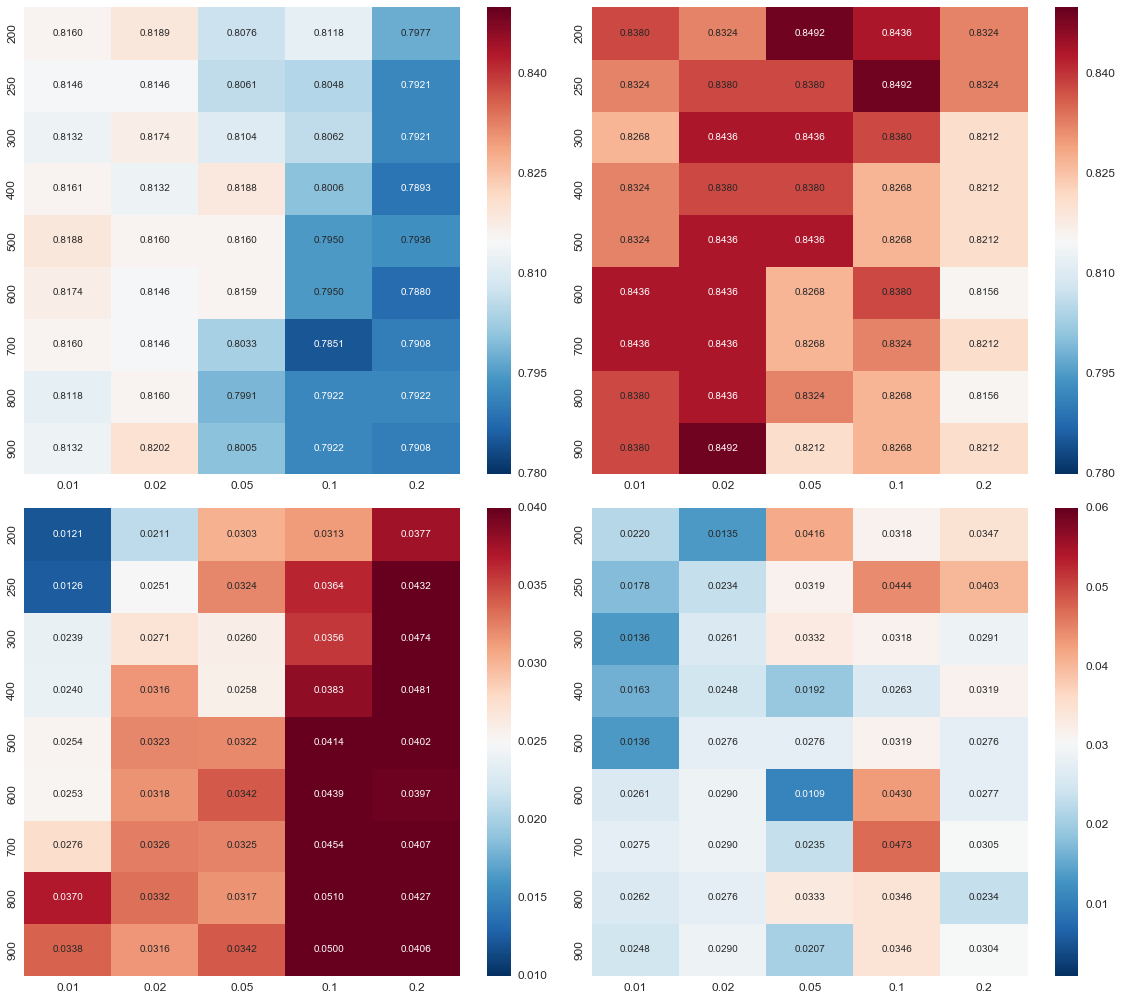

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(16,14))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.06, 
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

In [47]:
n_estimators = [200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]
learning_rates = [0.005, 0.01, 0.02, 0.05, 0.1]

train_scores = []
test_scores = []
train_std = []

for estimator in n_estimators:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = GradientBoostingClassifier(n_estimators=estimator, learning_rate=rate,
                                        random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

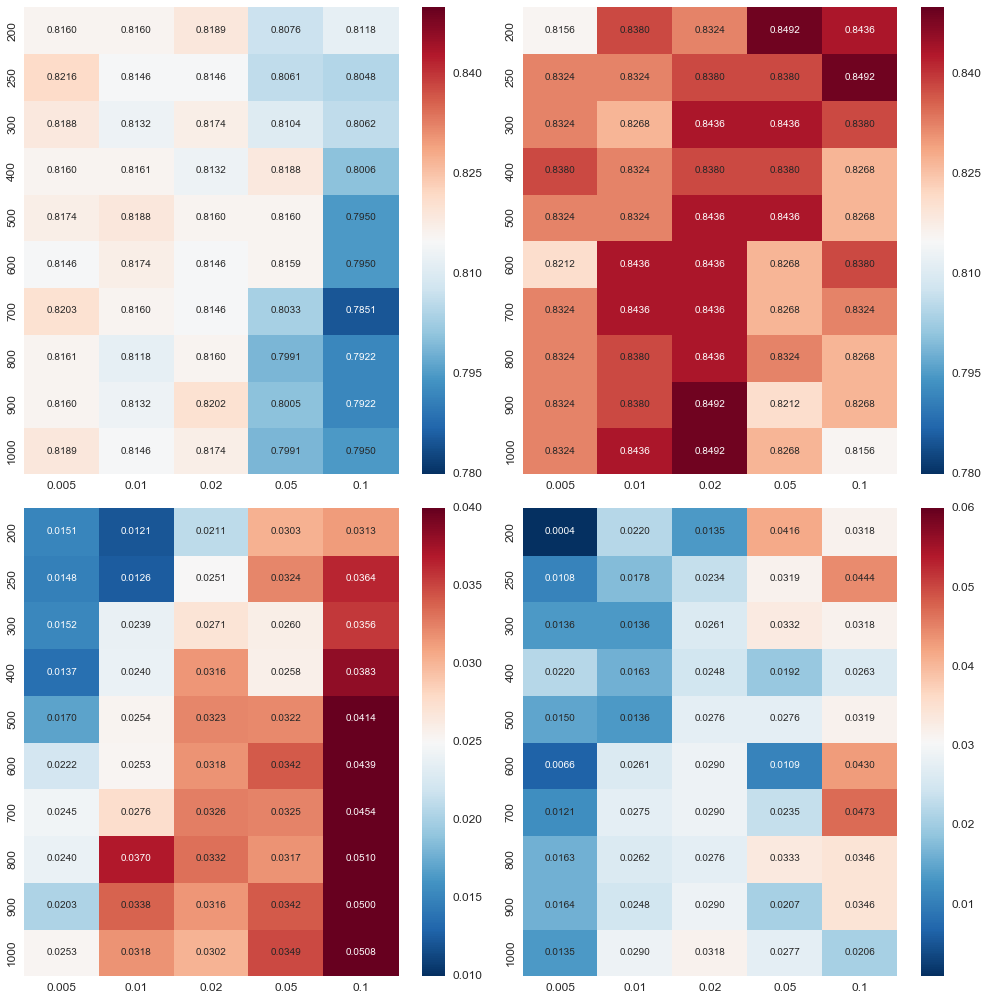

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14,14))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.06, 
            xticklabels=learning_rates, yticklabels=n_estimators,
            ax=axes[1][1]
           )


plt.tight_layout()

In [49]:
max_depths = [1, 2, 3, 4, 5]
learning_rates = [0.005, 0.01, 0.02, 0.05, 0.1]

train_scores = []
test_scores = []
train_std = []

for depth in max_depths:
    train_sc = []
    test_sc = []
    train_dev = []
    for rate in learning_rates:
        rf = GradientBoostingClassifier(n_estimators=500, learning_rate=rate, max_depth=depth,
                                        random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

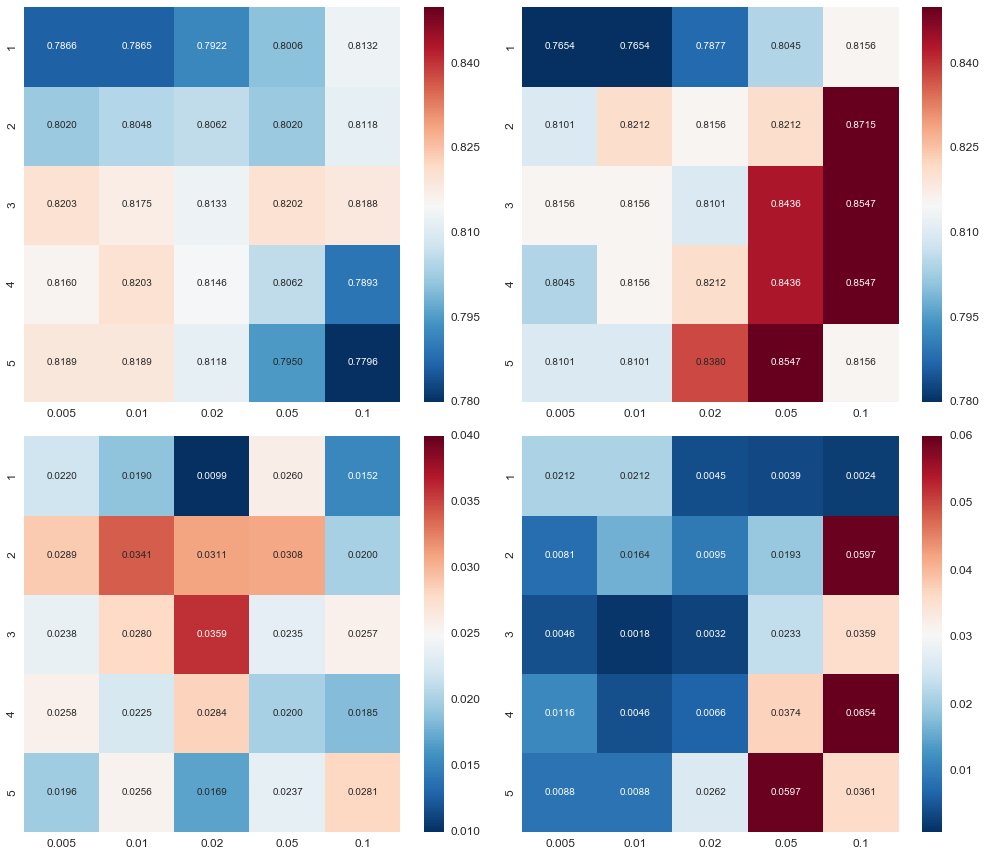

In [398]:
fig, axes = plt.subplots(2, 2, figsize=(14,12))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=max_depths,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.78, vmax=0.85,
            xticklabels=learning_rates, yticklabels=max_depths,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.01, vmax=0.04,
            xticklabels=learning_rates, yticklabels=max_depths,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.06, 
            xticklabels=learning_rates, yticklabels=max_depths,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [86]:
gbm_best = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, 
                                      max_depth=2, random_state=seed)

**Kaggle public score: 0.77033**

## Naive Bayes

### Model

In [87]:
nb_best = GaussianNB()

## Logistic regression

### Parameters tuning

In [52]:
cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
penals = ['l1', 'l2']

train_scores = []
test_scores = []
train_std = []

for c in cs:
    train_sc = []
    test_sc = []
    train_dev = []
    for penal in penals:
        rf = LogisticRegression(C=c, penalty=penal, random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

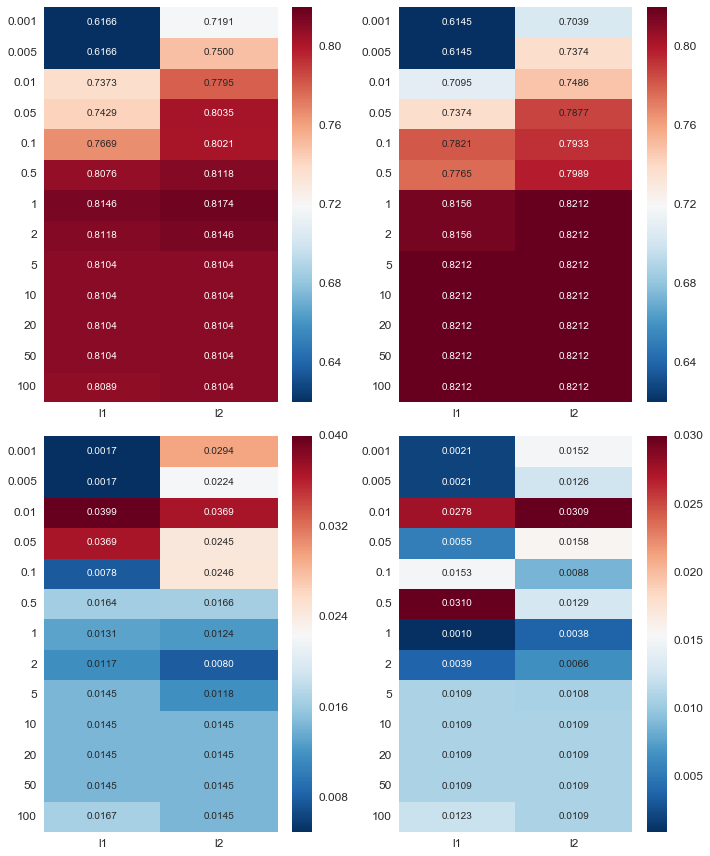

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10,12))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.62, vmax=0.82,
            xticklabels=penals, yticklabels=cs,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.62, vmax=0.82,
            xticklabels=penals, yticklabels=cs,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.005, vmax=0.04,
            xticklabels=penals, yticklabels=cs,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.03, 
            xticklabels=penals, yticklabels=cs,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [88]:
logreg_best = LogisticRegression(C=0.05)

**Kaggle public score: 0.77990**

## SVM

### Parameters tuning

In [55]:
cs = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
kernels = ['rbf', 'linear', 'poly']

train_scores = []
test_scores = []
train_std = []

for c in cs:
    train_sc = []
    test_sc = []
    train_dev = []
    for ker in kernels:
        rf = SVC(C=c, kernel=ker, random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

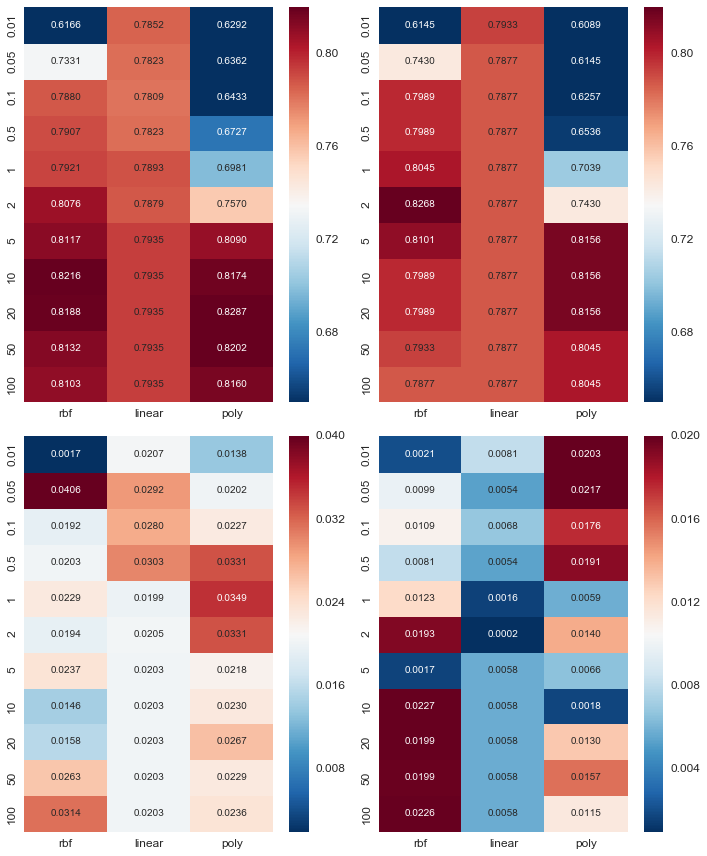

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(10,12))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.65, vmax=0.82,
            xticklabels=kernels, yticklabels=cs,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.65, vmax=0.82,
            xticklabels=kernels, yticklabels=cs,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04,
            xticklabels=kernels, yticklabels=cs,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.02, 
            xticklabels=kernels, yticklabels=cs,
            ax=axes[1][1]
           )


plt.tight_layout()

In [57]:
cs = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50]
gammas = [0.01, 0.02, 0.05, 0.1, 0.02, 0.5, 1]

train_scores = []
test_scores = []
train_std = []

for c in cs:
    train_sc = []
    test_sc = []
    train_dev = []
    for gam in gammas:
        rf = SVC(C=c, gamma=gam, random_state=seed)
        scores = cross_val_score(rf, X_tr, y_tr, scoring=scoring, cv=kfold_tr)
        train_score = scores.mean()
        train_deviation = scores.std()
        rf.fit(X_tr, y_tr)
        test_score = rf.score(X_ts, y_ts)
        
        train_sc.append(train_score)
        test_sc.append(test_score)
        train_dev.append(train_deviation)
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    train_std.append(train_dev)

train_np = np.array(train_scores)
test_np = np.array(test_scores)

diff = np.abs((train_np - test_np))

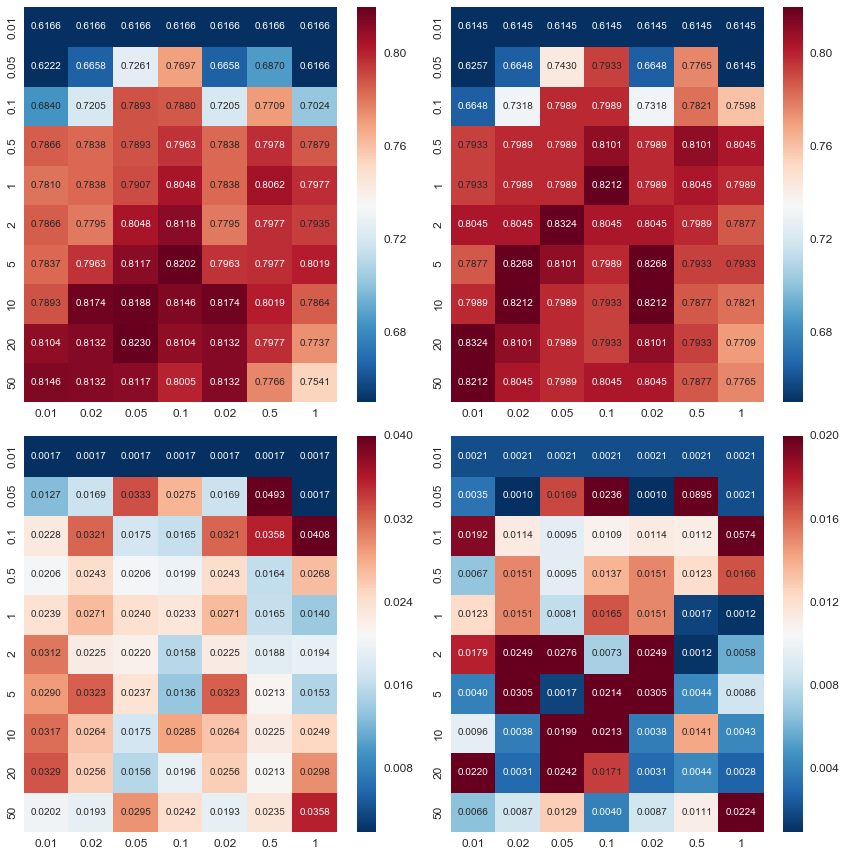

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.heatmap(train_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.65, vmax=0.82,
            xticklabels=gammas, yticklabels=cs,
            ax=axes[0][0]
           )

sns.heatmap(test_scores, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.65, vmax=0.82,
            xticklabels=gammas, yticklabels=cs,
            ax=axes[0][1]
           )

sns.heatmap(train_std, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.002, vmax=0.04,
            xticklabels=gammas, yticklabels=cs,
            ax=axes[1][0]
           )

sns.heatmap(diff, annot=True, fmt='.4f', cmap='RdBu_r', vmin=0.001, vmax=0.02, 
            xticklabels=gammas, yticklabels=cs,
            ax=axes[1][1]
           )


plt.tight_layout()

### Model

In [89]:
svc_best = SVC(C=0.5, gamma=0.1, probability=True)

**Kaggle public score: 0.76555**

## All models

In [90]:
estimators = [
    ('Logistic Regression', logreg_best),
    ('KNN', knn_best),
    ('SVC', svc_best),
    ('Random Forest', rf_best),
    ('Ada boost', ada_best),
    ('Gradient boost', gbm_best),
    ('Naive Bayes', nb_best), 
]

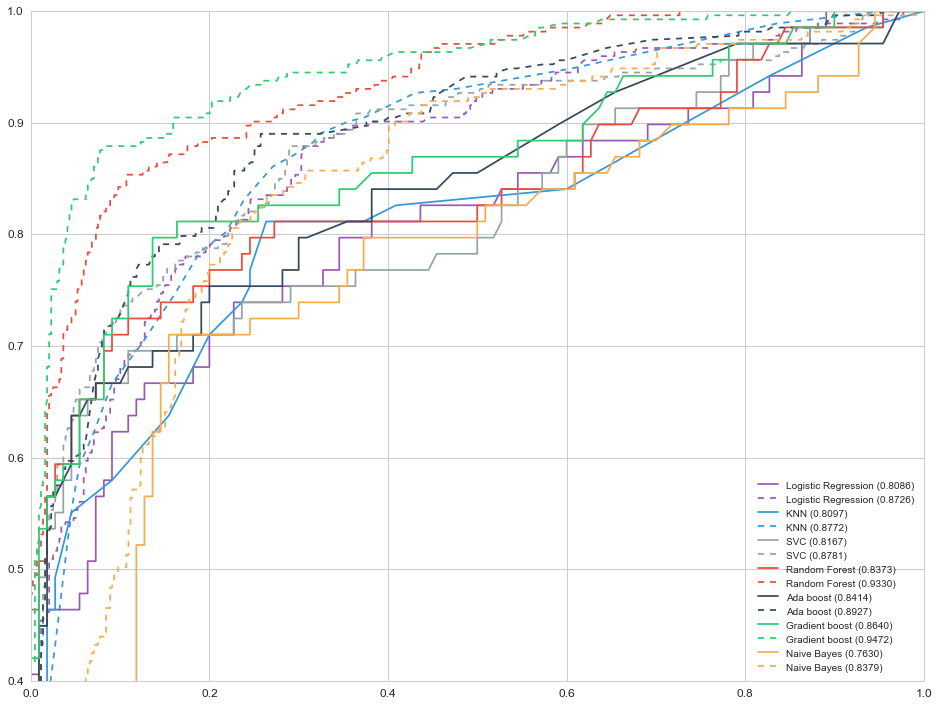

In [91]:
plt.figure(figsize=(16,12))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f4ac51"]
palette = sns.color_palette(flatui)

for i, (name, model) in zip(palette, estimators):
    model.fit(X_tr, y_tr)
    y_pred = model.predict_proba(X_ts)[:, 1]
    fpr, tpr, _ = roc_curve(y_ts, y_pred)
    auc_score = roc_auc_score(y_ts, y_pred)
    plt.plot(fpr, tpr, '-', c=i, 
             label='{} ({:.4f})'.format(name, auc_score))
    
    y_pred = model.predict_proba(X_tr)[:, 1]
    fpr, tpr, _ = roc_curve(y_tr, y_pred)
    auc_score = roc_auc_score(y_tr, y_pred)
    plt.plot(fpr, tpr, '--', c=i, 
             label='{} ({:.4f})'.format(name, auc_score))
_ = (plt.legend(loc=4), plt.ylim(0.4, 1.0))

In [92]:
for name, model in estimators:
    model.fit(X, y)
    y_pred = model.predict(X)
    print(name)
    print(confusion_matrix(y, y_pred))
    print()

Logistic Regression
[[470  79]
 [ 96 246]]

KNN
[[499  50]
 [120 222]]

SVC
[[483  66]
 [ 90 252]]

Random Forest
[[518  31]
 [ 92 250]]

Ada boost
[[471  78]
 [ 83 259]]

Gradient boost
[[519  30]
 [ 63 279]]

Naive Bayes
[[435 114]
 [ 78 264]]



In [93]:
print('\nF1 score\n=============\n')
for name, model in estimators:
    model.fit(X, y)
    y_pred = model.predict(X)
    print(name)
    print('Score: {:.4f}'.format(f1_score(y, y_pred)))
    print()


F1 score

Logistic Regression
Score: 0.7376

KNN
Score: 0.7231

SVC
Score: 0.7636

Random Forest
Score: 0.8026

Ada boost
Score: 0.7629

Gradient boost
Score: 0.8571

Naive Bayes
Score: 0.7333



In [94]:
for name, model in estimators:
    result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0:<20} ({1:.4f}) +/- ({2:.4f})".format(name, result.mean(), result.std()))

Logistic Regression  (0.7991) +/- (0.0380)
KNN                  (0.7903) +/- (0.0424)
SVC                  (0.8114) +/- (0.0284)
Random Forest        (0.8261) +/- (0.0432)
Ada boost            (0.8036) +/- (0.0275)
Gradient boost       (0.8407) +/- (0.0445)
Naive Bayes          (0.7812) +/- (0.0362)


## Comparisons: models + ensembles

In [95]:
estimators = [
    ('RF', rf_best),
    ('LR', logreg_best),
    ('SVC', svc_best),
#     ('Ada', ada_best),
    ('GBM', gbm_best),
    ('KNN', knn_best),
#     ('NB', nb_best),
]

In [96]:
voter1 = VotingClassifier(estimators=estimators, voting='soft', weights=[2, 2, 1, 2, 2])
voter2 = VotingClassifier(estimators=estimators, voting='soft', weights=[2, 2, 1, 2, 1])

In [97]:
submission = pd.DataFrame()
submission["PassengerId"] = df_test.index

softs = []
for (name, model) in estimators:
    model.fit(X, y)
    prediction = model.predict_proba(X_test)[:, 1]
    softs.append(name)
    submission[name] = prediction

voter1.fit(X, y)
prediction = voter1.predict_proba(X_test)[:, 1]
submission['voter1'] = prediction
submission['voter1_vote'] = submission.voter1.round().astype(int)

voter2.fit(X, y)
prediction = voter2.predict_proba(X_test)[:, 1]
submission['voter2'] = prediction
submission['voter2_vote'] = submission.voter2.round().astype(int)


submission['soft'] = np.average(submission[softs], axis=1)
submission['soft_vote'] = submission.soft.round().astype(int)

hards = []
for (name, model) in estimators:
    model.fit(X, y)
    prediction = model.predict(X_test).astype(int)
    nome = name + '_hard'
    hards.append(nome)
    submission[nome] = prediction
    
submission['hard'] = np.average(submission[hards], axis=1)
submission['hard_vote'] = submission.hard.round().astype(int)

submission['h_s_diff'] = np.abs(submission.hard_vote - submission.soft_vote)

In [98]:
condition = ((submission.voter1_vote != submission.voter2_vote) | 
             (submission.voter1_vote != submission.soft_vote) |
             (submission.voter2_vote != submission.soft_vote)
            )

submission.loc[condition, submission.columns[:12]]

,PassengerId,RF,LR,SVC,GBM,KNN,voter1,voter1_vote,voter2,voter2_vote,soft,soft_vote
18,910,0.470015,0.486989,0.590654,0.569152,0.433333,0.499822,0,0.510145,1,0.510029,1
33,925,0.453841,0.519193,0.585881,0.431877,0.533333,0.494584,0,0.491722,0,0.504825,1
72,964,0.461267,0.481912,0.672174,0.554629,0.400000,0.495079,0,0.509255,1,0.513997,1
87,979,0.480647,0.520712,0.668918,0.451912,0.400000,0.484823,0,0.497707,0,0.504438,1
138,1030,0.476608,0.503147,0.671961,0.451912,0.400000,0.480358,0,0.492692,0,0.500726,1
225,1117,0.480758,0.565182,0.656318,0.398899,0.466667,0.496804,0,0.502333,1,0.513565,1
252,1144,0.419252,0.533991,0.461732,0.345988,0.733333,0.502102,1,0.474394,0,0.498859,0
268,1160,0.482738,0.517201,0.669662,0.451912,0.400000,0.484590,0,0.497447,0,0.504302,1
412,1304,0.493398,0.485244,0.672781,0.530853,0.400000,0.497743,0,0.512254,1,0.516455,1


In [99]:
submission.loc[:, submission.columns[1:12]].describe()

,RF,LR,SVC,GBM,KNN,voter1,voter1_vote,voter2,voter2_vote,soft,soft_vote
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.398625,0.392205,0.394315,0.395941,0.387480,0.393202,0.342105,0.394435,0.349282,0.393713,0.358852
std,0.314520,0.255226,0.301163,0.337514,0.292686,0.289508,0.474983,0.292357,0.477315,0.289979,0.480238
min,0.074429,0.086113,0.076778,0.024933,0.000000,0.067504,0.000000,0.072693,0.000000,0.068918,0.000000
25%,0.113974,0.148519,0.142017,0.110929,0.100000,0.129920,0.000000,0.128296,0.000000,0.130773,0.000000
50%,0.294933,0.324618,0.162400,0.202024,0.366667,0.298841,0.000000,0.286203,0.000000,0.286916,0.000000
75%,0.653282,0.573874,0.761115,0.755510,0.658333,0.644092,1.000000,0.644376,1.000000,0.654515,1.000000
max,0.984805,0.973010,0.892704,0.991706,1.000000,0.947096,1.000000,0.942378,1.000000,0.942193,1.000000


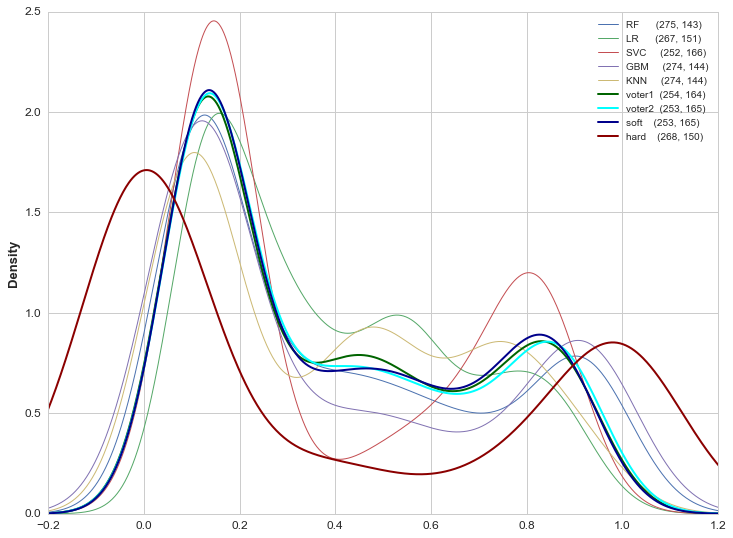

In [100]:
for (name, _) in estimators:
    vote = name + '_hard'
    lbl = '{:<7} ({}, {})'.format(name, 
                               submission.shape[0] - submission[vote].sum(), 
                               submission[vote].sum())
    submission[name].plot(kind='kde', label=lbl, lw=1)

lbl = '{:<7} ({:0.0f}, {:0.0f})'.format('voter1', 
                               submission.shape[0] - submission.voter1.sum(), 
                               submission.voter1.sum())    
submission.voter1.plot(kind='kde', label=lbl, lw=2.0, c='darkgreen')  

lbl = '{:<7} ({:0.0f}, {:0.0f})'.format('voter2', 
                               submission.shape[0] - submission.voter2.sum(), 
                               submission.voter2.sum())    
submission.voter2.plot(kind='kde', label=lbl, lw=2.0, c='cyan')  
    
lbl = '{:<7} ({:0.0f}, {:0.0f})'.format('soft', 
                               submission.shape[0] - submission.soft.sum(), 
                               submission.soft.sum())    
submission.soft.plot(kind='kde', label=lbl, lw=2.0, c='darkblue')

lbl = '{:<7} ({:0.0f}, {:0.0f})'.format('hard', 
                               submission.shape[0] - submission.hard.sum(), 
                               submission.hard.sum())
submission.hard.plot(kind='kde', label=lbl, lw=2.0, c='darkred')
_ = plt.legend(), plt.xlim(-0.2, 1.2)

# Submission

In [342]:
submission.voter2_vote

sub_csv = pd.DataFrame()
sub_csv["PassengerId"] = df_test.index
sub_csv["Survived"] = submission.voter2_vote

sub_csv.to_csv("ensemble_001.csv", index=False)

**Kaggle public score: 0.78469**